In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tea_df = pd.read_csv("train.csv")

In [3]:
tea_df.head()

,WeekEnding_Date,Kolkata_Average_Price,Kolkata_Ref_Price,Bangalore_Average_Price,Bangalore_Ref_Price,Cochin_Average_Price,Cochin_Ref_Price,Darjeeling_Average_Price,Darjeeling_Ref_Price,Ernakulam_Average_Price,Ernakulam_Ref_Price,Siliguri_Average_Price,Siliguri_Ref_Price,Guwahati_Average_Price,Guwahati_Ref_Price,Average
0,03/01/09,99.01,79.79,N.S.,76.19,84.02,70.07,81.66,57.83,68.94,51.67,70.74,53.88,65.55,46.75,69.700000
1,10/01/09,97.74,78.73,87.48,73.97,82.72,68.17,83.31,58.02,67.24,52.23,70.47,53.39,67.39,46.84,70.550000
2,17/01/09,95.95,71.01,87.66,71.01,80.58,67.16,82.25,57.49,69.64,52.48,71.66,53.18,69.51,48.04,69.830000
3,24/01/09,94.14,73.38,85.69,65.66,N.S.,65.57,80.87,54.59,N.S.,53.43,71.12,52.07,69.14,48.5,67.846667
4,31/01/09,91.45,70.39,N.S.,64.99,79.27,62.09,80.76,57.06,69.65,53.38,72.3,52.5,69.39,50.33,67.196923


In [4]:
tea_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   WeekEnding_Date           544 non-null    object 
 1   Kolkata_Average_Price     544 non-null    object 
 2   Kolkata_Ref_Price         542 non-null    object 
 3   Bangalore_Average_Price   544 non-null    object 
 4   Bangalore_Ref_Price       542 non-null    object 
 5   Cochin_Average_Price      544 non-null    object 
 6   Cochin_Ref_Price          541 non-null    object 
 7   Darjeeling_Average_Price  544 non-null    object 
 8   Darjeeling_Ref_Price      542 non-null    object 
 9   Ernakulam_Average_Price   544 non-null    object 
 10  Ernakulam_Ref_Price       543 non-null    object 
 11  Siliguri_Average_Price    543 non-null    object 
 12  Siliguri_Ref_Price        543 non-null    object 
 13  Guwahati_Average_Price    544 non-null    object 
 14  Guwahati_R

#### It can be noticed that some of the features have missing data, depicted either as N.S. or no sale, or is empty. These missing values can be replaced with 0, indicating that no sale has been made. We also have to check if there are other ways of representing no sale data, wrt different abbreviations used.

In [5]:
numeric_columns = [col for col in tea_df.columns if col!='WeekEnding_Date' and col!='Average']

In [6]:
numeric_columns

['Kolkata_Average_Price',
 'Kolkata_Ref_Price',
 'Bangalore_Average_Price',
 'Bangalore_Ref_Price',
 'Cochin_Average_Price',
 'Cochin_Ref_Price',
 'Darjeeling_Average_Price',
 'Darjeeling_Ref_Price',
 'Ernakulam_Average_Price',
 'Ernakulam_Ref_Price',
 'Siliguri_Average_Price',
 'Siliguri_Ref_Price',
 'Guwahati_Average_Price',
 'Guwahati_Ref_Price']

In [7]:
def convert_numeric(avg_price):
    try:
        return pd.to_numeric(avg_price)
    except:
        return avg_price

In [8]:
for col in numeric_columns:
    tea_df[col] = tea_df[col].apply(lambda price: convert_numeric(price))
    print(f"Total String values for column {col}:\n{tea_df[col].str.isnumeric().value_counts()}\n")

Total String values for column Kolkata_Average_Price:
False    40
Name: Kolkata_Average_Price, dtype: int64

Total String values for column Kolkata_Ref_Price:
False    40
Name: Kolkata_Ref_Price, dtype: int64

Total String values for column Bangalore_Average_Price:
False    47
Name: Bangalore_Average_Price, dtype: int64

Total String values for column Bangalore_Ref_Price:
False    47
Name: Bangalore_Ref_Price, dtype: int64

Total String values for column Cochin_Average_Price:
False    45
Name: Cochin_Average_Price, dtype: int64

Total String values for column Cochin_Ref_Price:
False    46
Name: Cochin_Ref_Price, dtype: int64

Total String values for column Darjeeling_Average_Price:
False    37
Name: Darjeeling_Average_Price, dtype: int64

Total String values for column Darjeeling_Ref_Price:
False    36
Name: Darjeeling_Ref_Price, dtype: int64

Total String values for column Ernakulam_Average_Price:
False    15
Name: Ernakulam_Average_Price, dtype: int64

Total String values for column 

In [9]:
def check_for_False(col,index):
    try:
        if tea_df[col][index].isnumeric()==False:
            return True
    except:
        return False

In [10]:
categorical_data = []
for col in numeric_columns:
    for index in range(len(tea_df)):
        if check_for_False(col,index):
            if tea_df[col][index] not in categorical_data:
                categorical_data.append(tea_df[col][index])

In [11]:
categorical_data

['No Sale', 'N.S.', 'N.S', 'NS', 'N. S.', 'No sale', 'N.S.\xa0', 'NS85.07']

#### Now that the different unique abbreviations have been identified, they can be replaced with 0. The same with missing values as well.

In [12]:
tea_df.replace(to_replace = categorical_data,value = "0.0",inplace = True)

In [13]:
tea_df = tea_df.fillna("0.0")

In [14]:
tea_df.isnull().sum()

WeekEnding_Date             0
Kolkata_Average_Price       0
Kolkata_Ref_Price           0
Bangalore_Average_Price     0
Bangalore_Ref_Price         0
Cochin_Average_Price        0
Cochin_Ref_Price            0
Darjeeling_Average_Price    0
Darjeeling_Ref_Price        0
Ernakulam_Average_Price     0
Ernakulam_Ref_Price         0
Siliguri_Average_Price      0
Siliguri_Ref_Price          0
Guwahati_Average_Price      0
Guwahati_Ref_Price          0
Average                     0
dtype: int64

#### One more task remaining is to convert the datatype of WeekEnding_Date to datatime and the other columns to float.

In [15]:
tea_df['WeekEnding_Date'] = pd.to_datetime(tea_df['WeekEnding_Date'],dayfirst=True)

In [16]:
tea_df.WeekEnding_Date

0     2009-01-03
1     2009-01-10
2     2009-01-17
3     2009-01-24
4     2009-01-31
         ...    
539   2019-05-11
540   2019-05-18
541   2019-05-25
542   2019-06-01
543   2019-06-08
Name: WeekEnding_Date, Length: 544, dtype: datetime64[ns]

#### After modifying the WeekEnding_Date feature, it is now represented in the format: YYYY-MM-DD

In [17]:
tea_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   WeekEnding_Date           544 non-null    datetime64[ns]
 1   Kolkata_Average_Price     544 non-null    object        
 2   Kolkata_Ref_Price         544 non-null    object        
 3   Bangalore_Average_Price   544 non-null    object        
 4   Bangalore_Ref_Price       544 non-null    object        
 5   Cochin_Average_Price      544 non-null    object        
 6   Cochin_Ref_Price          544 non-null    object        
 7   Darjeeling_Average_Price  544 non-null    object        
 8   Darjeeling_Ref_Price      544 non-null    object        
 9   Ernakulam_Average_Price   544 non-null    object        
 10  Ernakulam_Ref_Price       544 non-null    object        
 11  Siliguri_Average_Price    544 non-null    object        
 12  Siliguri_Ref_Price    

#### The other columns still have to be converted to float values. 

In [18]:
for col in numeric_columns:
    tea_df[[col]] = tea_df[[col]].astype(float)

In [19]:
tea_df.dtypes

WeekEnding_Date             datetime64[ns]
Kolkata_Average_Price              float64
Kolkata_Ref_Price                  float64
Bangalore_Average_Price            float64
Bangalore_Ref_Price                float64
Cochin_Average_Price               float64
Cochin_Ref_Price                   float64
Darjeeling_Average_Price           float64
Darjeeling_Ref_Price               float64
Ernakulam_Average_Price            float64
Ernakulam_Ref_Price                float64
Siliguri_Average_Price             float64
Siliguri_Ref_Price                 float64
Guwahati_Average_Price             float64
Guwahati_Ref_Price                 float64
Average                            float64
dtype: object

#### Peforming EDA to see how the average price varies per region

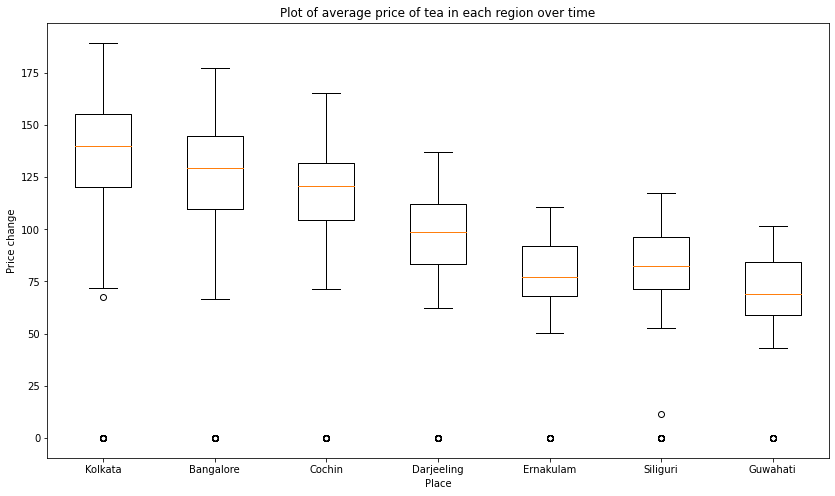

In [20]:
plt.figure(figsize=(14,8))
plt.ylabel("Price change")
plt.xlabel("Place")
plt.boxplot([tea_df['Kolkata_Average_Price'],tea_df['Bangalore_Average_Price'],tea_df['Cochin_Average_Price'],tea_df['Darjeeling_Average_Price'],tea_df['Ernakulam_Average_Price'],tea_df['Siliguri_Average_Price'],tea_df['Guwahati_Average_Price']])
plt.title("Plot of average price of tea in each region over time")
plt.xticks(ticks=[1,2,3,4,5,6,7],labels = ['Kolkata','Bangalore','Cochin','Darjeeling','Ernakulam','Siliguri','Guwahati'])
plt.show()

#### Repeating the same to visualize the reference prices

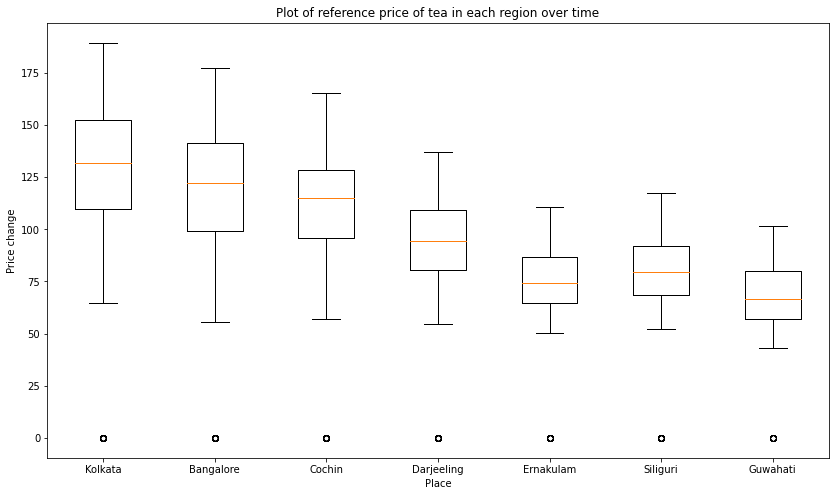

In [21]:
plt.figure(figsize=(14,8))
plt.ylabel("Price change")
plt.xlabel("Place")
plt.boxplot([tea_df['Kolkata_Ref_Price'],tea_df['Bangalore_Ref_Price'],tea_df['Cochin_Ref_Price'],tea_df['Darjeeling_Ref_Price'],tea_df['Ernakulam_Ref_Price'],tea_df['Siliguri_Ref_Price'],tea_df['Guwahati_Ref_Price']])
plt.title("Plot of reference price of tea in each region over time")
plt.xticks(ticks=[1,2,3,4,5,6,7],labels = ['Kolkata','Bangalore','Cochin','Darjeeling','Ernakulam','Siliguri','Guwahati'])
plt.show()

#### It is also necessary to scale the data so that it is within a range of 0-1. There are two approaches:
> Using Normalization -> MinMax Scalar<br>
> Using Standardization -> Using Standard Scalar.<br>
#### Checking the distribution to see if the data is normally distributed. If it is, then standardization is performanced, else normalization is performed.

In [22]:
sns.set_theme(style='dark',palette='icefire')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


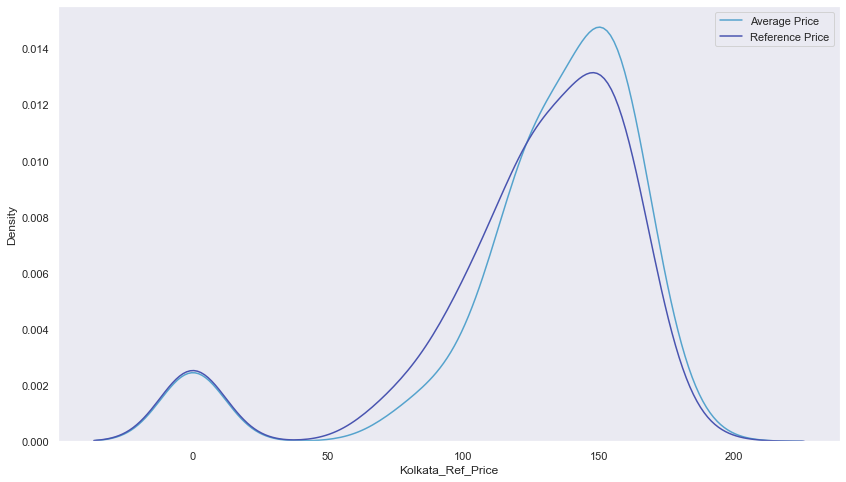

In [23]:
plt.figure(figsize=(14,8))
sns.distplot(tea_df['Kolkata_Average_Price'],hist=False,label='Average Price')
sns.distplot(tea_df['Kolkata_Ref_Price'],hist=False,label='Reference Price')
plt.legend(loc='best')
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


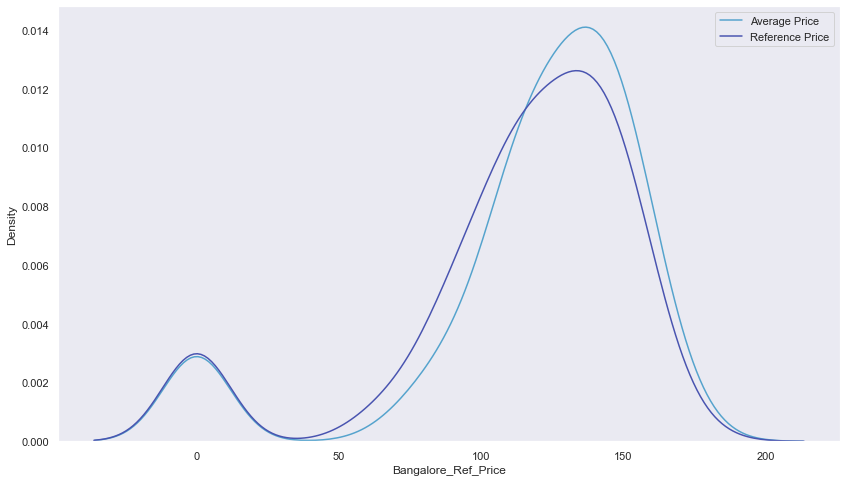

In [24]:
plt.figure(figsize=(14,8))
sns.distplot(tea_df['Bangalore_Average_Price'],hist=False,label='Average Price')
sns.distplot(tea_df['Bangalore_Ref_Price'],hist=False,label='Reference Price')
plt.legend(loc='best')
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


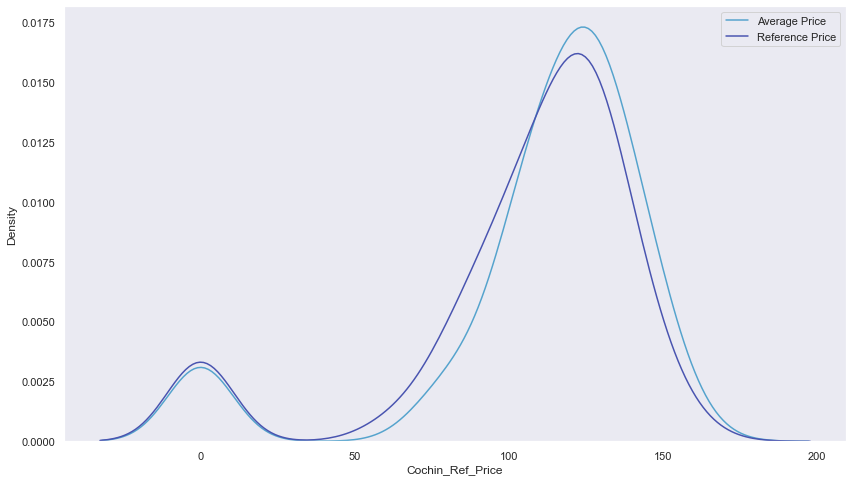

In [25]:
plt.figure(figsize=(14,8))
sns.distplot(tea_df['Cochin_Average_Price'],hist=False,label='Average Price')
sns.distplot(tea_df['Cochin_Ref_Price'],hist=False,label='Reference Price')
plt.legend(loc='best')
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


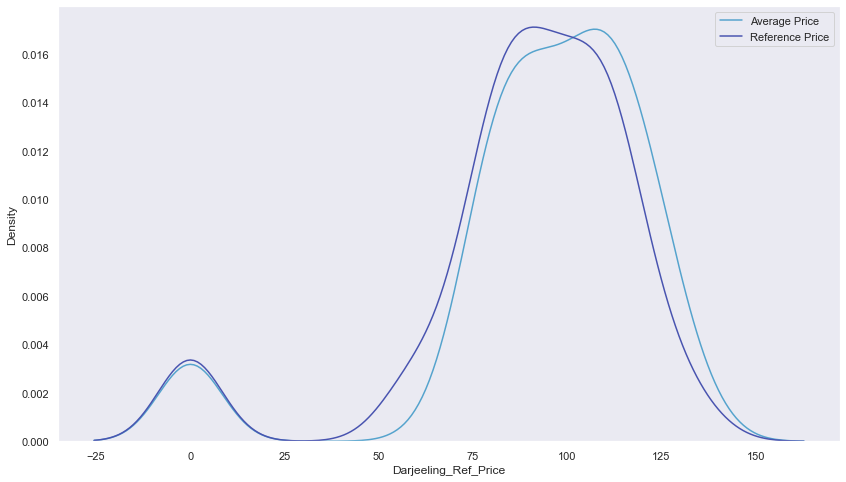

In [26]:
plt.figure(figsize=(14,8))
sns.distplot(tea_df['Darjeeling_Average_Price'],hist=False,label='Average Price')
sns.distplot(tea_df['Darjeeling_Ref_Price'],hist=False,label='Reference Price')
plt.legend(loc='best')
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


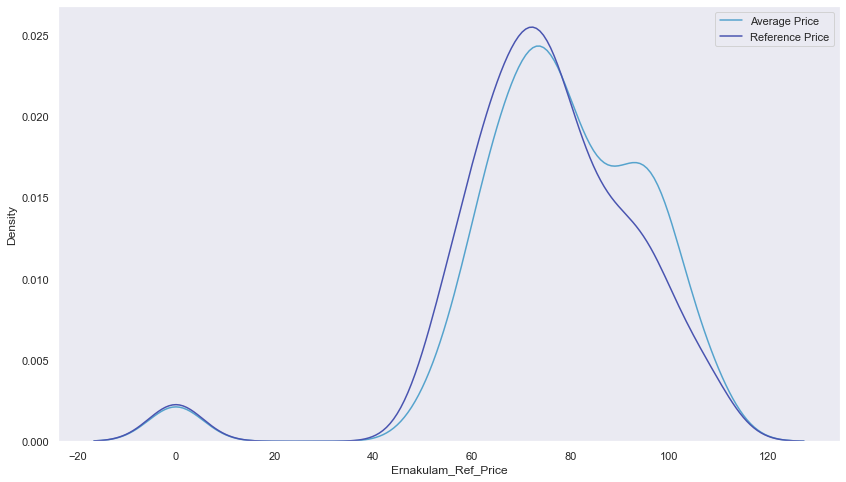

In [27]:
plt.figure(figsize=(14,8))
sns.distplot(tea_df['Ernakulam_Average_Price'],hist=False,label='Average Price')
sns.distplot(tea_df['Ernakulam_Ref_Price'],hist=False,label='Reference Price')
plt.legend(loc='best')
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


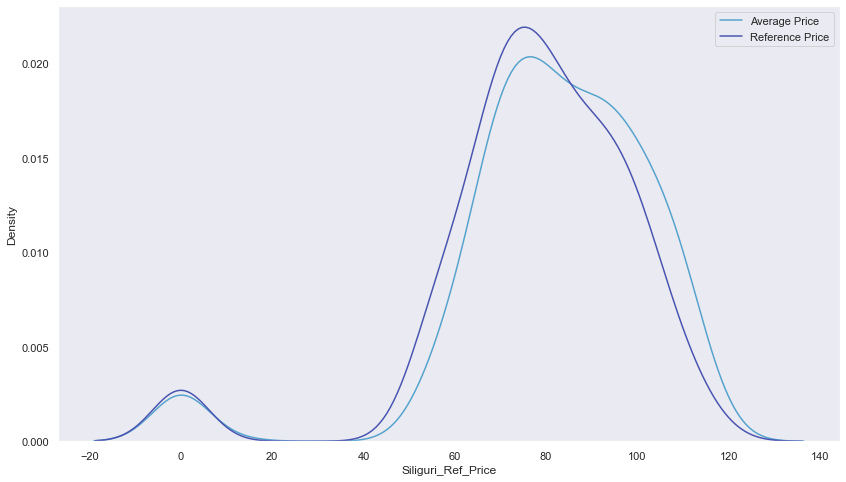

In [28]:
plt.figure(figsize=(14,8))
sns.distplot(tea_df['Siliguri_Average_Price'],hist=False,label='Average Price')
sns.distplot(tea_df['Siliguri_Ref_Price'],hist=False,label='Reference Price')
plt.legend(loc='best')
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


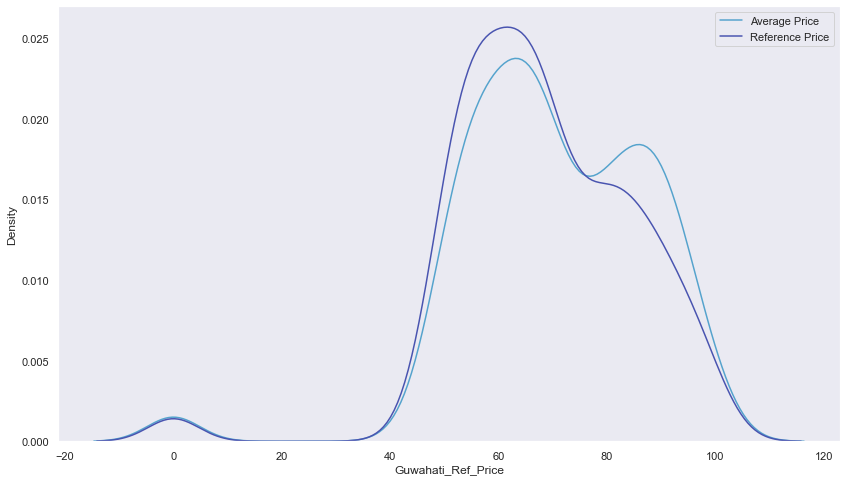

In [29]:
plt.figure(figsize=(14,8))
sns.distplot(tea_df['Guwahati_Average_Price'],hist=False,label='Average Price')
sns.distplot(tea_df['Guwahati_Ref_Price'],hist=False,label='Reference Price')
plt.legend(loc='best')
plt.show()

#### Using Min-Max scaler to scale the dataset

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
scaler = MinMaxScaler()

In [33]:
tea_df.iloc[:,1:] = scaler.fit_transform(tea_df.iloc[:,1:])

In [34]:
tea_df.head()

,WeekEnding_Date,Kolkata_Average_Price,Kolkata_Ref_Price,Bangalore_Average_Price,Bangalore_Ref_Price,Cochin_Average_Price,Cochin_Ref_Price,Darjeeling_Average_Price,Darjeeling_Ref_Price,Ernakulam_Average_Price,Ernakulam_Ref_Price,Siliguri_Average_Price,Siliguri_Ref_Price,Guwahati_Average_Price,Guwahati_Ref_Price,Average
0,2009-01-03,0.522811,0.421322,0.000000,0.429651,0.508996,0.424487,0.595016,0.421348,0.622483,0.466546,0.602196,0.458670,0.644353,0.459550,0.082173
1,2009-01-10,0.516105,0.415725,0.493429,0.417132,0.501121,0.412976,0.607039,0.422732,0.607133,0.471603,0.599898,0.454499,0.662440,0.460434,0.094806
2,2009-01-17,0.506653,0.374960,0.494444,0.400440,0.488157,0.406858,0.599315,0.418871,0.628804,0.473860,0.610028,0.452711,0.683279,0.472230,0.084105
3,2009-01-24,0.497096,0.387475,0.483332,0.370270,0.000000,0.397225,0.589260,0.397741,0.000000,0.482438,0.605431,0.443262,0.679642,0.476752,0.054627
4,2009-01-31,0.482892,0.371687,0.000000,0.366492,0.480221,0.376143,0.588458,0.415738,0.628894,0.481986,0.615476,0.446923,0.682100,0.494741,0.044970


#### Checking the data for stationarity. This is not necessary as an LSTM is used. But stationary data can improve the model performance. There are three tests done.
- Rolling stats 
- ADF test
- KPSS test